In [1368]:
import pandas as pd
import numpy as np
import datetime
from scipy.stats import skew
import sklearn
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math
#Accessing performance using Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn import metrics
import pickle

In [1369]:
df_1= pd.read_csv('Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv')

In [1370]:
df_1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [1371]:
df_2= pd.read_csv('Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv')


In [1372]:
df_2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [1373]:
df_3= pd.read_csv('Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv')
df_4= pd.read_csv('Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv')
df_5= pd.read_csv('Resale flat prices based on registration date from Jan-2017 onwards.csv')


In [1374]:
df_3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [1375]:
df_4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [1376]:
df_5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [1377]:
df=pd.concat([df_1,df_2,df_3,df_4,df_5],ignore_index=True)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [1378]:
df[['year', 'month']] = df['month'].str.split('-', expand=True)
df[['storey_start', 'storey_end']] = df['storey_range'].str.split('TO',expand=True)
df['month']=pd.to_numeric(df['month'])
df['year']=pd.to_numeric(df['year'])
df['floor_area_sqm']=pd.to_numeric(df['floor_area_sqm'])
df['resale_price']=pd.to_numeric(df['resale_price'])
df['storey_start']=pd.to_numeric(df['storey_start'])
df['storey_end']=pd.to_numeric(df['storey_end'])

df.drop(columns='storey_range',inplace=True)

In [1379]:
df.shape

(938269, 13)

In [1380]:
df.dtypes

month                    int64
town                    object
flat_type               object
block                   object
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
year                     int64
storey_start             int64
storey_end               int64
dtype: object

In [1381]:
df['town'].value_counts()

town
TAMPINES           80722
YISHUN             70785
JURONG WEST        67442
BEDOK              67182
WOODLANDS          66336
ANG MO KIO         52528
HOUGANG            51317
BUKIT BATOK        45128
CHOA CHU KANG      38837
BUKIT MERAH        34767
PASIR RIS          33475
SENGKANG           33354
TOA PAYOH          31870
QUEENSTOWN         29063
GEYLANG            28468
CLEMENTI           28268
BUKIT PANJANG      28039
KALLANG/WHAMPOA    27613
JURONG EAST        25010
SERANGOON          23008
PUNGGOL            21490
BISHAN             21425
SEMBAWANG          14219
MARINE PARADE       8097
CENTRAL AREA        7218
BUKIT TIMAH         2544
LIM CHU KANG          64
Name: count, dtype: int64

In [1382]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [1383]:
df['flat_type'].value_counts()

flat_type
4 ROOM              357125
3 ROOM              298695
5 ROOM              198050
EXECUTIVE            70386
2 ROOM               12162
1 ROOM                1307
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [1384]:
df['flat_type']=df['flat_type'].replace({'MULTI GENERATION': 'MULTI-GENERATION'})

In [1385]:
df['flat_type'].value_counts()

flat_type
4 ROOM              357125
3 ROOM              298695
5 ROOM              198050
EXECUTIVE            70386
2 ROOM               12162
1 ROOM                1307
MULTI-GENERATION       544
Name: count, dtype: int64

In [1386]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

In [1387]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17742
BEDOK RESERVOIR RD    14834
ANG MO KIO AVE 10     13913
ANG MO KIO AVE 3      12240
HOUGANG AVE 8          9419
                      ...  
SENGKANG WEST RD          5
MARINE PARADE CTRL        3
TAMPINES NTH DR 1         3
CANBERRA VIEW             2
ALJUNIED AVE 2            1
Name: count, Length: 588, dtype: int64

In [1388]:
df['floor_area_sqm'].value_counts()

floor_area_sqm
67.0     70033
104.0    47549
68.0     40726
84.0     36402
92.0     31291
         ...  
131.1        1
307.0        1
152.4        1
69.9         1
90.8         1
Name: count, Length: 214, dtype: int64

In [1389]:
df['floor_area_sq_ft'] = df['floor_area_sqm'] * 10.7639

In [1390]:
df['flat_model'].value_counts()

flat_model
Model A                   199087
Improved                  170870
New Generation            111376
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          47977
Simplified                 34704
Apartment                  25946
Standard                   25425
SIMPLIFIED                 23258
Maisonette                 17735
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10275
APARTMENT                   9901
DBSS                        3426
Adjoined flat               1270
Model A-Maisonette          1111
MODEL A-MAISONETTE           982
Terrace                      450
Type S1                      447
MULTI GENERATION             279
Multi Generation             265
TERRACE                      247
Type S2                      223
2-room                       157
Premium Apartment Loft       114
Premium Maisonette            86
Improved-Maisonette           84

In [1391]:
df['flat_model']=df['flat_model'].replace({'IMPROVED': 'Improved'})
df['flat_model']=df['flat_model'].replace({'NEW GENERATION': 'New Generation'})
df['flat_model']=df['flat_model'].replace({'MODEL A': 'Model A'})
df['flat_model']=df['flat_model'].replace({'PREMIUM APARTMENT': 'Premium Apartment'})
df['flat_model']=df['flat_model'].replace({'SIMPLIFIED': 'Simplified'})
df['flat_model']=df['flat_model'].replace({'APARTMENT': 'Apartment'})
df['flat_model']=df['flat_model'].replace({'STANDARD': 'Standard'})
df['flat_model']=df['flat_model'].replace({'MAISONETTE': 'Maisonette'})
df['flat_model']=df['flat_model'].replace({'MODEL A-MAISONETTE': 'Model A-Maisonette'})
df['flat_model']=df['flat_model'].replace({'TERRACE': 'Terrace'})
df['flat_model']=df['flat_model'].replace({'MULTI GENERATION': 'Multi Generation'})
df['flat_model']=df['flat_model'].replace({'2-ROOM': '2-room'})
df['flat_model']=df['flat_model'].replace({'IMPROVED-MAISONETTE': 'Improved-Maisonette'})

In [1392]:
df['flat_model'].value_counts()

flat_model
Model A                   269468
Improved                  244459
New Generation            190274
Simplified                 57962
Premium Apartment          47983
Standard                   42800
Apartment                  35847
Maisonette                 29950
Model A2                   10275
DBSS                        3426
Model A-Maisonette          2093
Adjoined flat               1270
Terrace                      697
Multi Generation             544
Type S1                      447
Type S2                      223
2-room                       178
Improved-Maisonette          128
Premium Apartment Loft       114
Premium Maisonette            86
3Gen                          45
Name: count, dtype: int64

In [1393]:
df['lease_commence_date'].value_counts()

lease_commence_date
1985    88056
1984    63940
1988    51112
1987    43162
1978    41605
1986    38912
1989    32496
1980    32250
1997    31275
1979    31201
1993    28427
1996    28352
1998    25995
1983    23248
1976    21728
1999    21207
1981    21098
1977    20887
1992    20400
2001    19819
1995    19168
2000    18680
1975    17522
2003    16052
1974    14691
1982    13428
2002    12810
1970    11536
2015    10627
1990     9365
1973     8666
2004     8602
1969     8416
1971     7921
2016     6650
1994     6616
1967     6241
2018     6192
1972     5877
2013     5752
2017     5708
2012     5156
2005     4125
2014     3942
2006     3282
2011     2757
2019     2716
2008     2210
1968     1881
2009     1844
2010     1408
1991     1260
2007     1016
2020      948
1966       34
Name: count, dtype: int64

In [1394]:
df['resale_price'].value_counts()

resale_price
300000.0    6941
350000.0    6897
280000.0    6559
320000.0    6548
380000.0    6365
            ... 
238998.0       1
158598.0       1
240570.0       1
242428.0       1
950500.0       1
Name: count, Length: 9692, dtype: int64

In [1395]:
df['remaining_lease'].value_counts()

remaining_lease
68                    2328
67                    1857
94 years 10 months    1704
94 years 09 months    1704
94 years 11 months    1673
                      ... 
97 years 01 month        1
48                       1
93 years 0 months        1
95 years 0 months        1
66 years 0 months        1
Name: count, Length: 729, dtype: int64

In [1396]:
df['remaining_lease'].fillna(99-(df['year']-df['lease_commence_date']),inplace=True)

In [1397]:
df['remaining_lease'] = pd.to_numeric(df['remaining_lease'], errors='coerce')

In [1398]:

df['age_of_property']= df['year']-df['lease_commence_date']

In [1399]:
df['age_of_property'].value_counts()

age_of_property
 5     51669
 4     50421
 6     38727
 10    34466
 13    34409
       ...  
 57      104
 0       100
-1        47
-2         4
 58        2
Name: count, Length: 61, dtype: int64

In [1400]:
df.dtypes

month                    int64
town                    object
flat_type               object
block                   object
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
year                     int64
storey_start             int64
storey_end               int64
floor_area_sq_ft       float64
age_of_property          int64
dtype: object

In [1401]:
mask= df['remaining_lease']>99
df=df[~mask] 

In [1402]:
df['remaining_lease'].value_counts()

remaining_lease
94.0    39044
95.0    38087
86.0    32839
88.0    32374
85.0    32326
89.0    32243
87.0    31943
93.0    30957
90.0    30002
84.0    29128
91.0    27912
92.0    27435
83.0    26923
82.0    25513
81.0    24683
80.0    23826
79.0    23506
78.0    22504
77.0    20630
76.0    19804
75.0    18660
74.0    17429
73.0    15814
72.0    15037
71.0    13899
70.0    12325
69.0    10938
68.0    10176
67.0     8871
96.0     7803
66.0     7111
65.0     6137
64.0     5289
63.0     4831
62.0     4003
61.0     3620
60.0     2893
59.0     2212
58.0     1787
57.0     1415
56.0     1112
55.0      695
54.0      488
97.0      454
53.0      419
52.0      367
98.0      209
51.0      152
50.0      138
99.0      100
49.0       88
48.0        1
Name: count, dtype: int64

In [1403]:
df.dtypes


month                    int64
town                    object
flat_type               object
block                   object
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
year                     int64
storey_start             int64
storey_end               int64
floor_area_sq_ft       float64
age_of_property          int64
dtype: object

In [1404]:
df.shape

(938218, 15)

In [1405]:
df['year'].value_counts()

year
1999    57782
1998    51095
2001    38055
2002    36098
1996    34916
2000    34862
2010    34854
1997    31759
2009    30482
2005    30033
2004    29110
2021    29087
2003    29003
2006    27427
1995    27277
2008    27262
2007    26982
2022    26720
1994    26355
2023    25755
2020    23333
2012    23198
2024    22915
2011    22280
2019    22186
2018    21561
2017    20509
2016    19373
1993    18115
2015    17780
2013    16097
2014    16096
1992    14502
1991    12854
1990    12505
Name: count, dtype: int64

In [1406]:
df['storey_start'].value_counts()

storey_start
4     235136
7     212453
1     191137
10    180865
13     63119
16     24943
19     11672
22      7567
25      3536
6       2474
28      1708
11      1259
31       672
34       618
37       531
40       253
21        92
43        66
46        53
26        39
49        18
36         7
Name: count, dtype: int64

In [1407]:
df['storey_end'].value_counts()

storey_end
6     235136
9     212453
3     188437
12    180865
15     64378
18     24678
21     11672
24      7567
27      3536
5       2700
10      2474
30      1747
33       670
36       618
39       531
20       265
42       253
25        92
45        66
48        53
51        18
40         7
35         2
Name: count, dtype: int64

In [1408]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        192066
year                        0
storey_start                0
storey_end                  0
floor_area_sq_ft            0
age_of_property             0
dtype: int64

In [1409]:
df.shape

(938218, 15)

In [1410]:
df['remaining_lease'].mode()

0    94.0
Name: remaining_lease, dtype: float64

In [1411]:
df['remaining_lease'].fillna(94.0, inplace=True)

In [1412]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
storey_start           0
storey_end             0
floor_area_sq_ft       0
age_of_property        0
dtype: int64

In [1413]:
df.shape

(938218, 15)

In [1414]:
df['Floor_median'] = df[['storey_start', 'storey_end']].median(axis=1)

In [1415]:
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,storey_start,storey_end,floor_area_sq_ft,age_of_property,Floor_median
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,Improved,1977,9000.0,86.0,1990,10,12,333.6809,13,11.0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,Improved,1977,6000.0,86.0,1990,4,6,333.6809,13,5.0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,Improved,1977,8000.0,86.0,1990,10,12,333.6809,13,11.0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,Improved,1977,6000.0,86.0,1990,7,9,333.6809,13,8.0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,New Generation,1976,47200.0,85.0,1990,4,6,785.7647,14,5.0


In [1416]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'remaining_lease',
       'year', 'storey_start', 'storey_end', 'floor_area_sq_ft',
       'age_of_property', 'Floor_median'],
      dtype='object')

In [1417]:
Categoricaldata = ['town', 'flat_type', 'block', 'street_name', 'flat_model']
Numericaldata = ['month', 'lease_commence_date', 'resale_price', 'remaining_lease', 'year', 'floor_area_sq_ft','Floor_median', 'age_of_property']
new_df = df[Numericaldata]
new_df_c=df[Categoricaldata]
new_df.head()

,month,lease_commence_date,resale_price,remaining_lease,year,floor_area_sq_ft,Floor_median,age_of_property
0,1,1977,9000.0,86.0,1990,333.6809,11.0,13
1,1,1977,6000.0,86.0,1990,333.6809,5.0,13
2,1,1977,8000.0,86.0,1990,333.6809,11.0,13
3,1,1977,6000.0,86.0,1990,333.6809,8.0,13
4,1,1976,47200.0,85.0,1990,785.7647,5.0,14


In [1418]:
new_df_c.head()

,town,flat_type,block,street_name,flat_model
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,Improved
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,Improved
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,Improved
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,Improved
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,New Generation


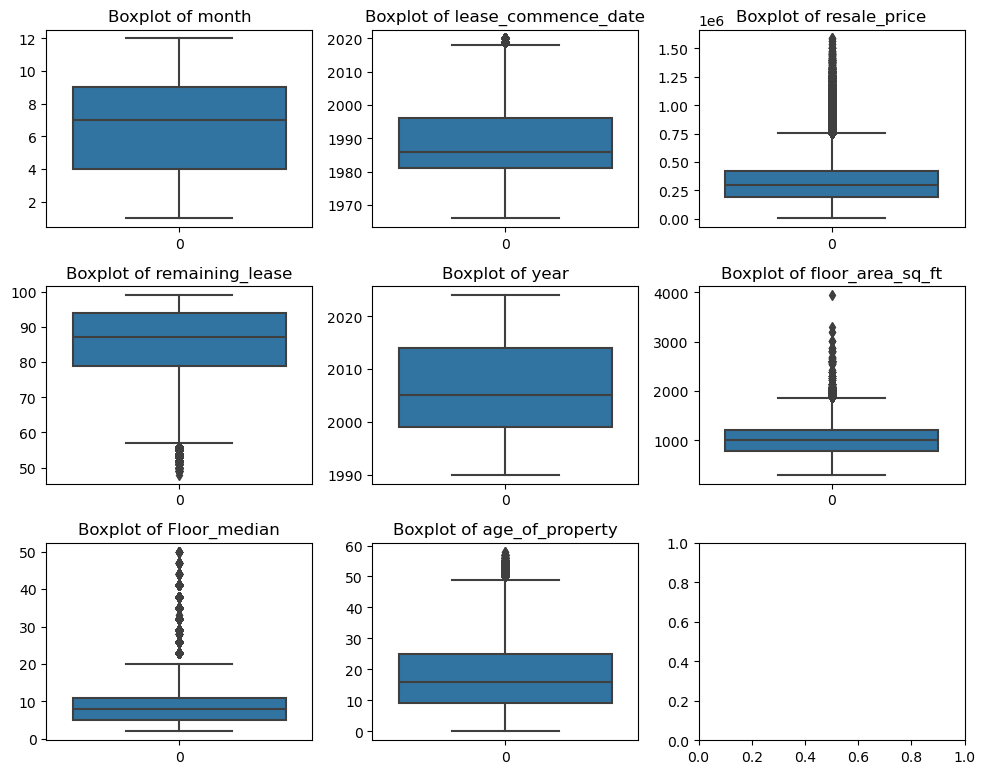

In [1419]:
# Define the number of columns and rows for the subplot grid
num_cols = 3
num_rows = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,8))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the DataFrame columns and plot
for i, column in enumerate(new_df.columns):
    sns.boxplot(new_df[column], ax=axes[i])  # Replace with desired plot type
    axes[i].set_title(f'Boxplot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

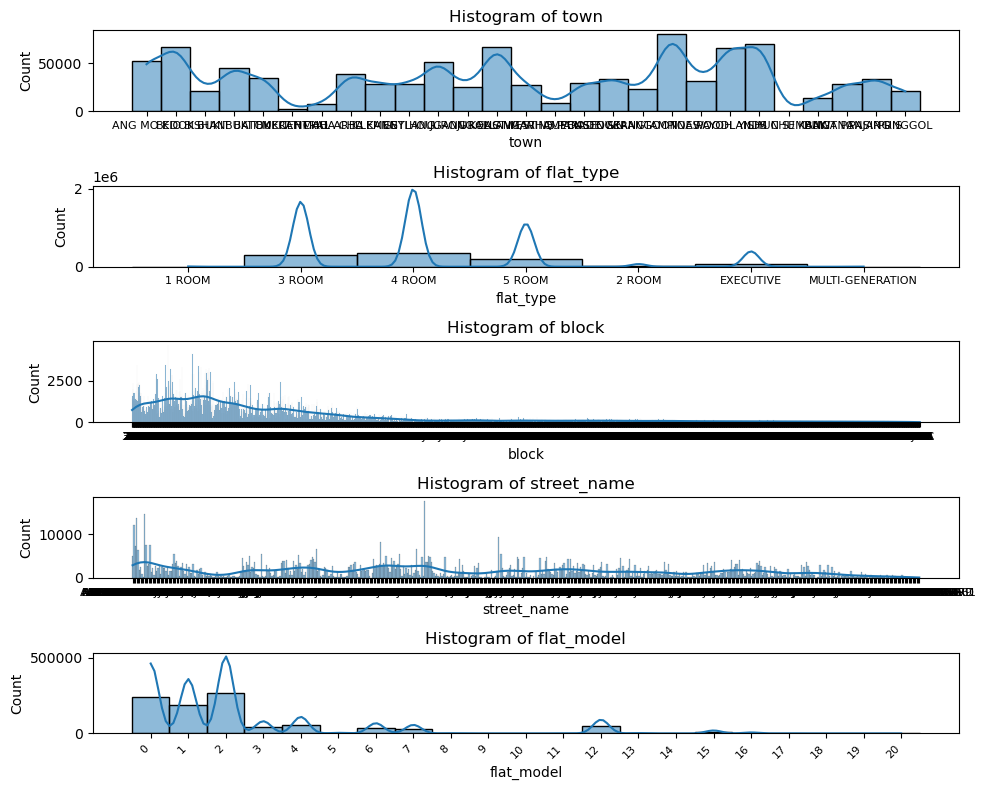

In [1420]:
# Define the number of columns and rows for the subplot grid
num_cols = 1
num_rows = 5

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the DataFrame columns and plot
for i, column in enumerate(new_df_c.columns):
    sns.histplot(new_df_c[column], ax=axes[i], bins=10, kde=True)  # Replace with desired plot type
    axes[i].set_title(f'Histogram of {column}')
    axes[i].tick_params(axis='x', labelsize=8)
axes[i].set_xticklabels(axes[i].get_xticks(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

plt.show()

In [1421]:
features = df[[ 'floor_area_sqm', 'lease_commence_date', 'resale_price', 'remaining_lease', 'floor_area_sq_ft','Floor_median', 'age_of_property']]


    # Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=4)

# Fit the model
iso_forest.fit(features)

# Predict anomalies (-1 for anomalies, 1 for normal points)
df['anomaly'] = iso_forest.predict(features)


    
print(df)

        month        town  flat_type block       street_name  floor_area_sqm  \
0           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1            31.0   
1           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1            31.0   
2           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1            31.0   
3           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1            31.0   
4           1  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1            73.0   
...       ...         ...        ...   ...               ...             ...   
938264     10      YISHUN     5 ROOM   870      YISHUN ST 81           122.0   
938265     10      YISHUN  EXECUTIVE   654      YISHUN AVE 4           164.0   
938266     10      YISHUN  EXECUTIVE   654      YISHUN AVE 4           164.0   
938267     10      YISHUN  EXECUTIVE   358    YISHUN RING RD           145.0   
938268     10      YISHUN  EXECUTIVE   824      YISHUN ST 81           142.0   

            flat_model  lease_commence_

In [1422]:
df = df[df['anomaly'] != -1]
print(df)

        month        town flat_type block       street_name  floor_area_sqm  \
4           1  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1            73.0   
5           1  ANG MO KIO    3 ROOM   211  ANG MO KIO AVE 3            67.0   
6           1  ANG MO KIO    3 ROOM   202  ANG MO KIO AVE 3            67.0   
7           1  ANG MO KIO    3 ROOM   235  ANG MO KIO AVE 3            67.0   
8           1  ANG MO KIO    3 ROOM   235  ANG MO KIO AVE 3            67.0   
...       ...         ...       ...   ...               ...             ...   
938259     10      YISHUN    5 ROOM  504C      YISHUN ST 51           113.0   
938260     10      YISHUN    5 ROOM  502D      YISHUN ST 51           112.0   
938261     10      YISHUN    5 ROOM  502B      YISHUN ST 51           112.0   
938262     10      YISHUN    5 ROOM   644      YISHUN ST 61           123.0   
938264     10      YISHUN    5 ROOM   870      YISHUN ST 81           122.0   

            flat_model  lease_commence_date  resale

In [1423]:
df.dtypes


month                    int64
town                    object
flat_type               object
block                   object
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
year                     int64
storey_start             int64
storey_end               int64
floor_area_sq_ft       float64
age_of_property          int64
Floor_median           float64
anomaly                  int32
dtype: object

In [1424]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
storey_start           0
storey_end             0
floor_area_sq_ft       0
age_of_property        0
Floor_median           0
anomaly                0
dtype: int64

In [1425]:
features_ = [ 'floor_area_sqm', 'lease_commence_date', 'resale_price', 'remaining_lease', 'floor_area_sq_ft','Floor_median', 'age_of_property']
df_iso = df[features_]
df[features_].dtypes


floor_area_sqm         float64
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
floor_area_sq_ft       float64
Floor_median           float64
age_of_property          int64
dtype: object

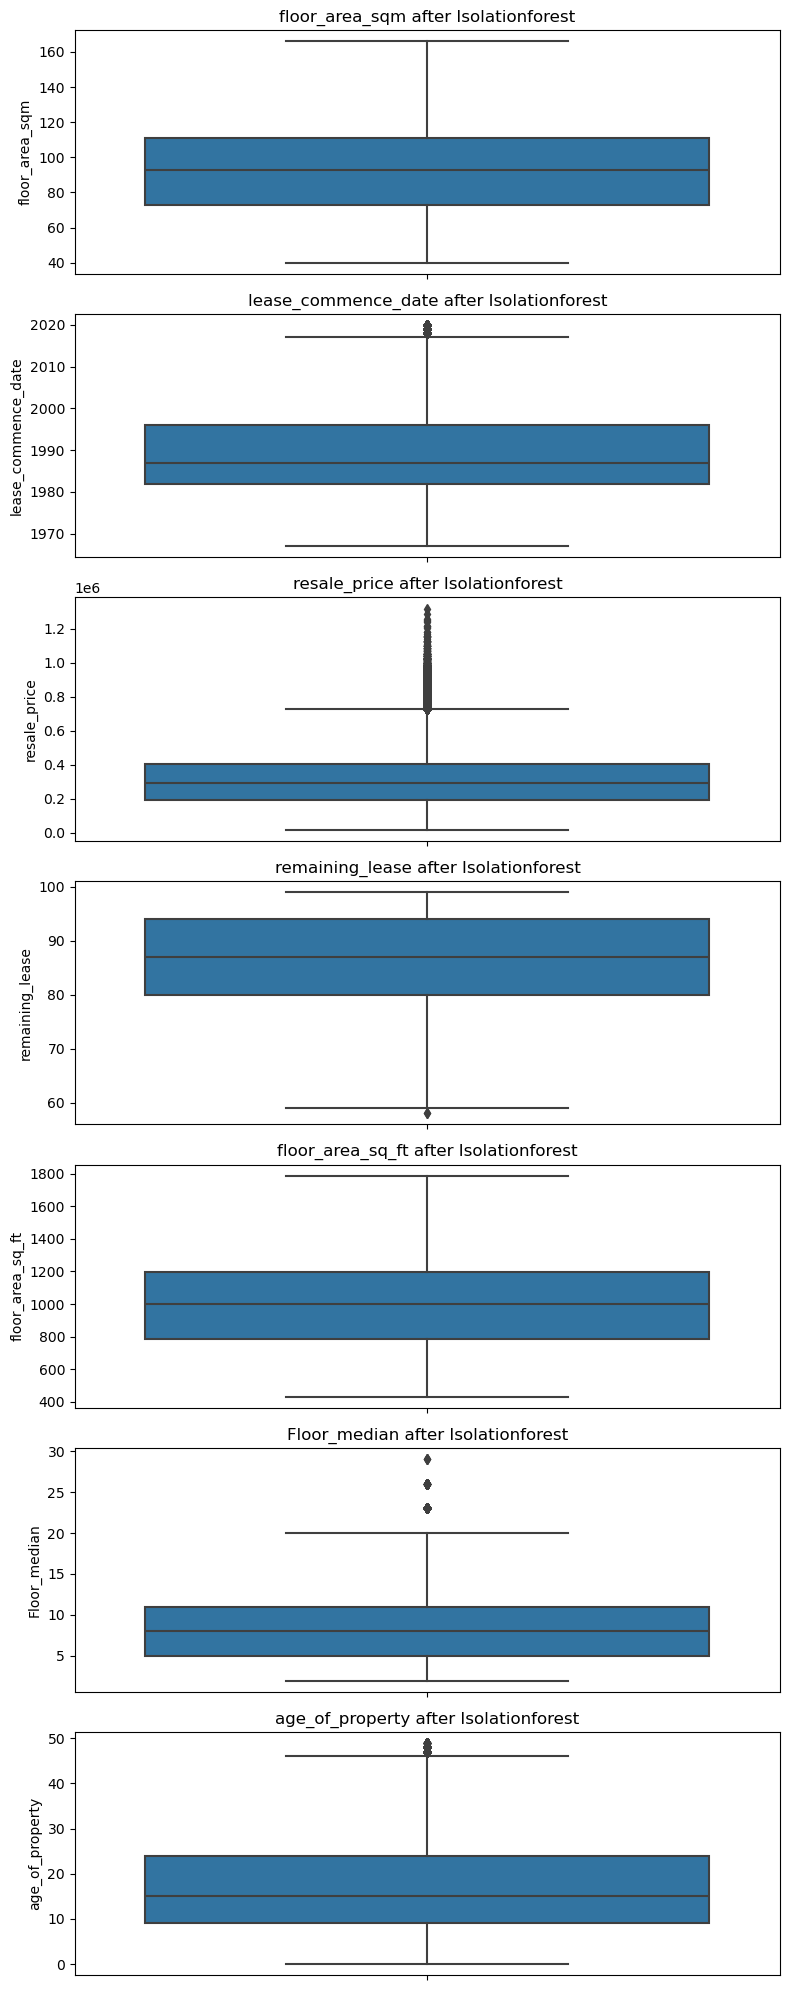

In [1426]:
# Define the number of columns and rows for the subplot grid
num_cols = 1
num_rows = 7

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8,20))

# Flatten the axes array for easy indexing
#axes = axes.flatten()

# Loop through the DataFrame columns and plot
for i, column in enumerate(df_iso.columns):
    sns.boxplot(data =df_iso, y=df_iso[column], ax=axes[i])  # Replace with desired plot type
    axes[i].set_title(f'{column} after Isolationforest')

# Adjust layout
plt.tight_layout()
plt.show()

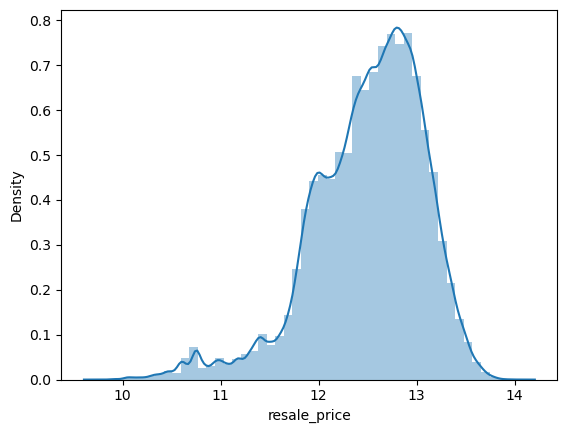

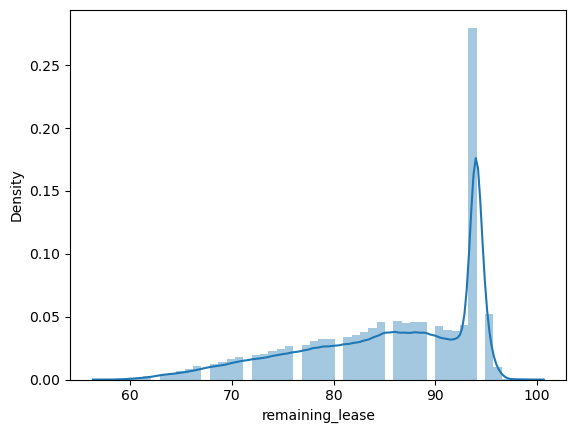

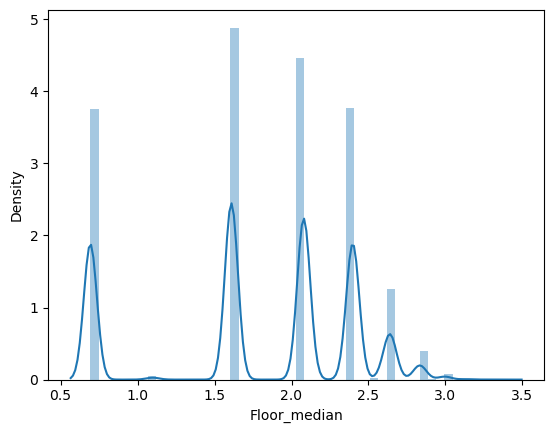

In [1427]:
##data transformation using log function

df['resale_price'] = np.log(df['resale_price'])
sns.distplot(df['resale_price'])
plt.show()

df['lease_commence_date'] = np.log(df['lease_commence_date'])
sns.distplot(df['remaining_lease'])
plt.show()


df['Floor_median'] = np.log(df['Floor_median'])
sns.distplot(df['Floor_median'])
plt.show()




In [1428]:

Numericaldata_ = ['lease_commence_date', 'resale_price', 'remaining_lease']
new_df_ = df[Numericaldata_]
new_df_.head()

,lease_commence_date,resale_price,remaining_lease
4,7.588830,10.762149,85.0
5,7.589336,10.736397,86.0
6,7.589336,10.645425,86.0
7,7.589336,10.545341,86.0
8,7.589336,10.596635,86.0


In [1429]:
print(new_df_.columns)

Index(['lease_commence_date', 'resale_price', 'remaining_lease'], dtype='object')


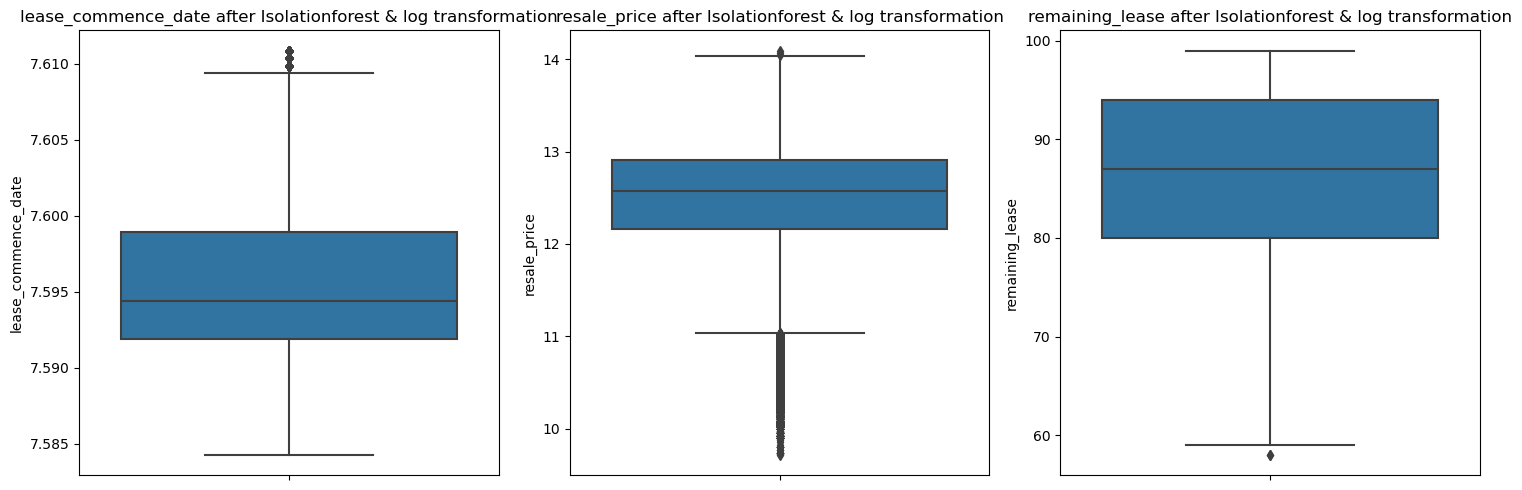

In [1430]:
# Define the number of columns and rows for the subplot grid
num_cols = 3
num_rows = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,5))

# Flatten the axes array for easy indexing
#axes = axes.flatten()

# Loop through the DataFrame columns and plot
for i, column in enumerate(new_df_.columns):
    sns.boxplot(data =new_df_, y=new_df_[column], ax=axes[i])  # Replace with desired plot type
    axes[i].set_title(f'{column} after Isolationforest & log transformation')

# Adjust layout
plt.tight_layout()
plt.show()

In [1431]:

def outlier(df, column):
   
    # Step 1: Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Step 2: Identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # If you prefer to cap the outliers instead of removing:
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


In [1432]:
outlier(df,'remaining_lease')
outlier(df,'lease_commence_date')
outlier(df,'resale_price')

In [1433]:
Outliers = ['lease_commence_date', 'remaining_lease', 'resale_price']
df_o = df[Outliers]
df_o.head()

,lease_commence_date,remaining_lease,resale_price
4,7.588830,85.0,11.032608
5,7.589336,86.0,11.032608
6,7.589336,86.0,11.032608
7,7.589336,86.0,11.032608
8,7.589336,86.0,11.032608


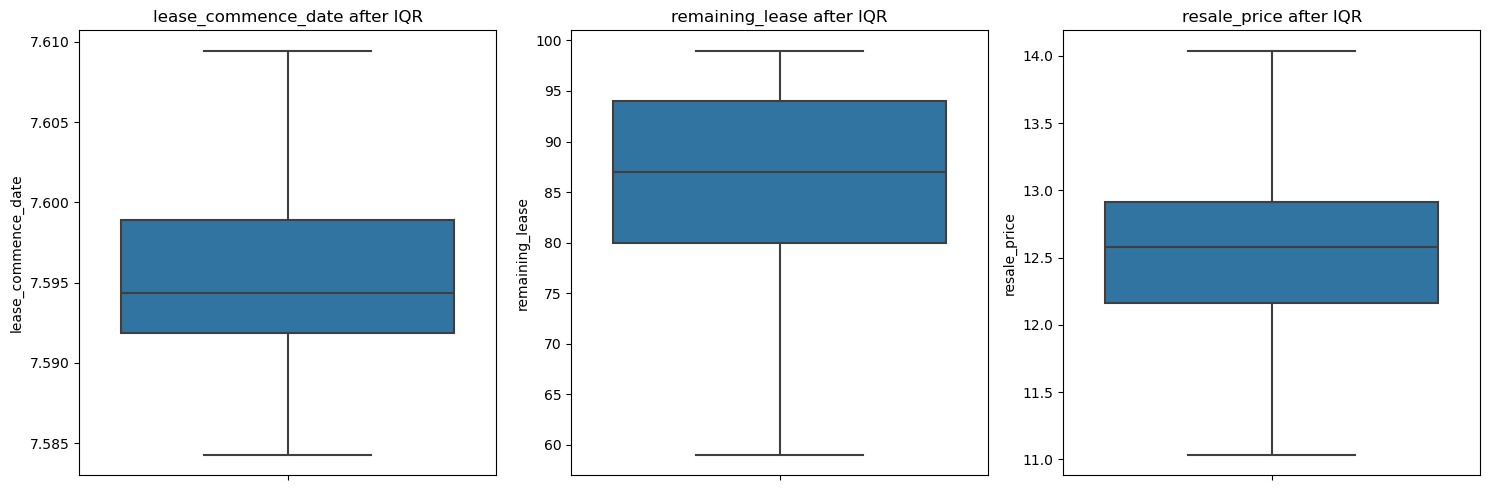

In [1434]:

# Define the number of columns and rows for the subplot grid
num_cols = 3
num_rows = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,5))

# Flatten the axes array for easy indexing
#axes = axes.flatten()

# Loop through the DataFrame columns and plot
for i, column in enumerate(df_o.columns):
    sns.boxplot(data =df_o, y=df_o[column], ax=axes[i])  # Replace with desired plot type
    axes[i].set_title(f'{column} after IQR')

# Adjust layout
plt.tight_layout()
plt.show()


In [1435]:
Numericaldata_final = ['month', 'lease_commence_date', 'resale_price', 'remaining_lease', 'year', 'floor_area_sq_ft','Floor_median', 'age_of_property']
df_final= df[Numericaldata_final]


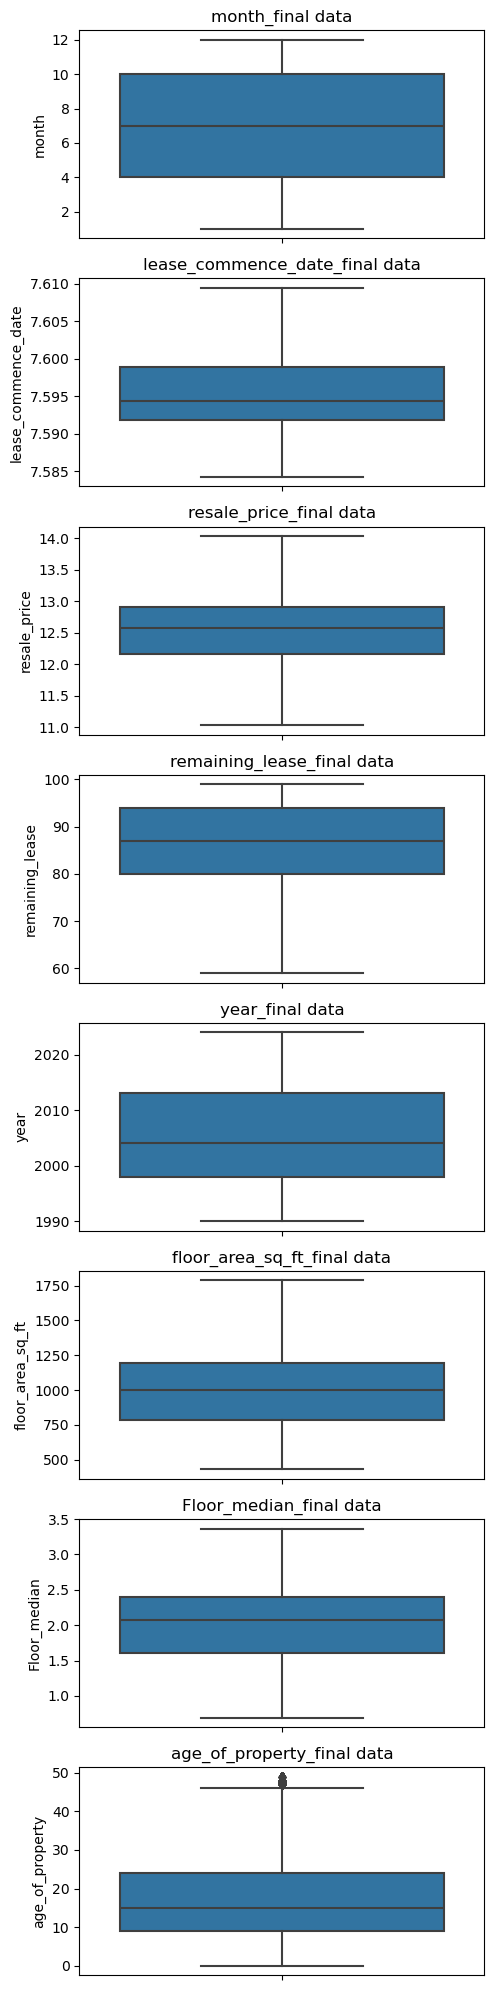

In [1436]:

# Define the number of columns and rows for the subplot grid
num_cols = 1
num_rows = 8

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5,20))

# Flatten the axes array for easy indexing
#axes = axes.flatten()

# Loop through the DataFrame columns and plot
for i, column in enumerate(df_final.columns):
    sns.boxplot(data =df_final, y=df_final[column], ax=axes[i])  # Replace with desired plot type
    axes[i].set_title(f'{column}_final data')

# Adjust layout
plt.tight_layout()
plt.show()


In [1437]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'remaining_lease',
       'year', 'storey_start', 'storey_end', 'floor_area_sq_ft',
       'age_of_property', 'Floor_median', 'anomaly'],
      dtype='object')

In [1438]:
#drop the columns 
df.drop(columns=['floor_area_sqm','storey_start','storey_end','anomaly'],inplace=True)


In [1439]:
df.head()

,month,town,flat_type,block,street_name,flat_model,lease_commence_date,resale_price,remaining_lease,year,floor_area_sq_ft,age_of_property,Floor_median
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,New Generation,7.588830,11.032608,85.0,1990,785.7647,14,1.609438
5,1,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,New Generation,7.589336,11.032608,86.0,1990,721.1813,13,0.693147
6,1,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,New Generation,7.589336,11.032608,86.0,1990,721.1813,13,2.079442
7,1,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,New Generation,7.589336,11.032608,86.0,1990,721.1813,13,2.397895
8,1,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,New Generation,7.589336,11.032608,86.0,1990,721.1813,13,1.609438


In [1440]:
#use ordinal encoder to convert categorical data into numerical data.
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

df['town'] = OE.fit_transform(df[['town']])
print(df)
OE1 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['flat_type'] = OE1.fit_transform(df[['flat_type']])

OE2 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['block'] = OE2.fit_transform(df[['block']])


OE4 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['flat_model'] = OE4.fit_transform(df[['flat_model']])


        month  town flat_type block       street_name      flat_model  \
4           1   0.0    3 ROOM   216  ANG MO KIO AVE 1  New Generation   
5           1   0.0    3 ROOM   211  ANG MO KIO AVE 3  New Generation   
6           1   0.0    3 ROOM   202  ANG MO KIO AVE 3  New Generation   
7           1   0.0    3 ROOM   235  ANG MO KIO AVE 3  New Generation   
8           1   0.0    3 ROOM   235  ANG MO KIO AVE 3  New Generation   
...       ...   ...       ...   ...               ...             ...   
938259     10  26.0    5 ROOM  504C      YISHUN ST 51        Improved   
938260     10  26.0    5 ROOM  502D      YISHUN ST 51        Improved   
938261     10  26.0    5 ROOM  502B      YISHUN ST 51        Improved   
938262     10  26.0    5 ROOM   644      YISHUN ST 61        Improved   
938264     10  26.0    5 ROOM   870      YISHUN ST 81        Improved   

        lease_commence_date  resale_price  remaining_lease  year  \
4                  7.588830     11.032608             8

In [1441]:
df['town'].value_counts()

town
23.0    78193
26.0    69088
13.0    63799
1.0     62798
25.0    61714
0.0     48992
11.0    48980
3.0     42168
8.0     37712
17.0    31586
21.0    31142
5.0     26313
9.0     25839
4.0     24522
12.0    23128
24.0    22770
22.0    21987
14.0    20997
10.0    20478
18.0    20251
2.0     19266
19.0    15618
20.0    13728
16.0     6082
7.0      5103
6.0      2078
15.0       64
Name: count, dtype: int64

In [1442]:
df['flat_type'].value_counts()

flat_type
2.0    344874
1.0    266956
3.0    179157
4.0     51930
0.0      1352
5.0       127
Name: count, dtype: int64

In [1443]:
df['block'].value_counts()

block
375.0     3523
0.0       3366
3.0       3116
53.0      3106
32.0      3000
          ... 
2693.0       1
2707.0       1
68.0         1
496.0        1
1764.0       1
Name: count, Length: 2708, dtype: int64

In [1444]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17456
BEDOK RESERVOIR RD    14143
ANG MO KIO AVE 10     13135
ANG MO KIO AVE 3      11658
HOUGANG AVE 8          9135
                      ...  
OUTRAM HILL               8
SENGKANG WEST RD          4
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
TAMPINES NTH DR 1         1
Name: count, Length: 583, dtype: int64

In [1445]:
df['flat_model'].value_counts()

flat_model
8.0     255192
5.0     217362
12.0    189100
16.0     57946
13.0     45068
3.0      27488
7.0      20487
17.0     16650
10.0     10274
4.0       2156
9.0       1614
2.0        315
18.0       219
19.0       133
11.0       127
6.0         90
20.0        63
15.0        46
1.0         27
0.0         26
14.0        13
Name: count, dtype: int64

In [1446]:
df['block'].value_counts()

block
375.0     3523
0.0       3366
3.0       3116
53.0      3106
32.0      3000
          ... 
2693.0       1
2707.0       1
68.0         1
496.0        1
1764.0       1
Name: count, Length: 2708, dtype: int64

In [1447]:
df.dtypes

month                    int64
town                   float64
flat_type              float64
block                  float64
street_name             object
flat_model             float64
lease_commence_date    float64
resale_price           float64
remaining_lease        float64
year                     int64
floor_area_sq_ft       float64
age_of_property          int64
Floor_median           float64
dtype: object

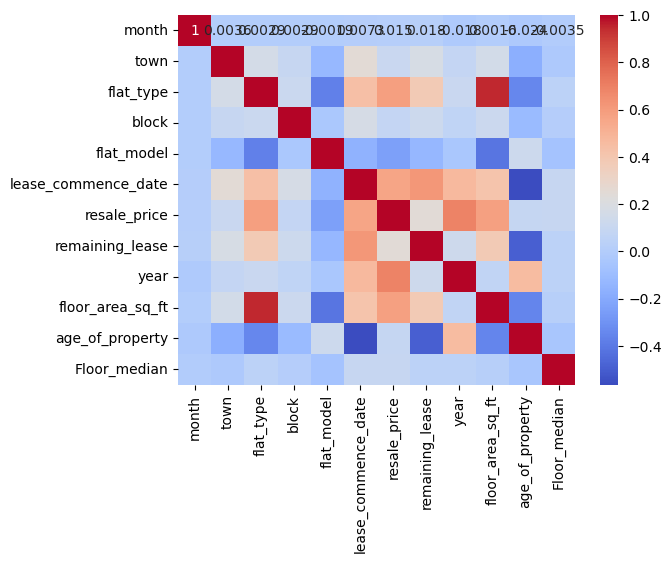

In [1448]:
sns.heatmap(df.drop(['street_name'], axis=1).corr(), cmap='coolwarm', annot=True)
plt.show()

In [1449]:
## Regression modelling

In [1450]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'flat_model',
       'lease_commence_date', 'resale_price', 'remaining_lease', 'year',
       'floor_area_sq_ft', 'age_of_property', 'Floor_median'],
      dtype='object')

In [1451]:
#split data into X, y
x=df[[ 'town','flat_type', 'block', 'flat_model','lease_commence_date', 'remaining_lease', 'floor_area_sq_ft', 'age_of_property', 'Floor_median']]
y=df['resale_price']

In [1452]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaler.transform(x)

array([[-1.54620505, -1.14936313, -0.87739341, ..., -0.96549954,
        -0.31155715, -0.28960271],
       [-1.54620505, -1.14936313, -0.89943521, ..., -1.21929088,
        -0.41295913, -1.69375823],
       [-1.54620505, -1.14936313, -0.95389144, ..., -1.21929088,
        -0.41295913,  0.43064705],
       ...,
       [ 1.38593125,  1.11256247,  0.48012254, ...,  0.68414416,
        -1.12277302,  0.43064705],
       [ 1.38593125,  1.11256247,  0.97671147, ...,  1.14942828,
         1.9192865 ,  0.43064705],
       [ 1.38593125,  1.11256247,  1.73650549, ...,  1.10712973,
         2.02068848, -0.28960271]])

In [1453]:
df.shape

(844396, 13)

In [1506]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state=122)

In [1507]:
x_train.head()

,town,flat_type,block,flat_model,lease_commence_date,remaining_lease,floor_area_sq_ft,age_of_property,Floor_median
259410,11.0,4.0,1618.0,7.0,7.596894,92.0,1614.5850,7,2.397895
209282,1.0,1.0,1106.0,5.0,7.587817,75.0,785.7647,24,2.079442
283308,19.0,1.0,686.0,17.0,7.585789,70.0,602.7784,29,1.609438
338135,9.0,1.0,2162.0,12.0,7.590852,78.0,882.6398,21,2.079442
550437,8.0,4.0,1745.0,7.0,7.598900,87.0,1582.2933,12,1.609438


In [1508]:
x_train.shape

(591077, 9)

In [1489]:
x_test.shape

(168880, 9)

In [1490]:
y_train.shape

(675516,)

In [1491]:
y_test.shape

(168880,)

In [1365]:

lin = LinearRegression()
lin.fit(x_train, y_train)
train_pred = lin.predict(x_train)
mse_train = math.sqrt(mean_squared_error(y_train, train_pred))
pred = lin.predict(x_test)
mse_test = math.sqrt(mean_squared_error(y_test, pred))
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, pred)
print(f'RMSE: {mse_train, mse_test}')
print(f'R2: {r2_train, r2_test}')

RMSE: (0.28084556884247336, 0.2821946621780767)
R2: (0.7610918564119115, 0.7599778849263977)


In [1366]:
from sklearn.tree import DecisionTreeRegressor
import sklearn
dc_r = DecisionTreeRegressor()
dc_r.fit(x_train, y_train)
train_pred = dc_r.predict(x_train)
mse_train = math.sqrt(mean_squared_error(y_train, train_pred))
pred = dc_r.predict(x_test)
mse_test = math.sqrt(mean_squared_error(y_test, pred))
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, pred)
print(f'RMSE: {mse_train, mse_test}')
print(f'R2: {r2_train, r2_test}')

RMSE: (0.038058243828842035, 0.11576289722786869)
R2: (0.995612740833382, 0.9596082709869125)


In [1509]:
dc_ = DecisionTreeRegressor(max_depth= 12, min_samples_split= 8)
dc_.fit(x_train, y_train)
train_pred = dc_.predict(x_train)
mse_train = math.sqrt(mean_squared_error(y_train, train_pred))
pred = dc_.predict(x_test)
mse_test = math.sqrt(mean_squared_error(y_test, pred))
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, pred)
print(f'RMSE: {mse_train, mse_test}')
print(f'R2: {r2_train, r2_test}')

RMSE: (0.14292353352739623, 0.14546097540210107)
R2: (0.9321795396879707, 0.9293537659478336)


In [1510]:
pred

array([12.49956208, 13.16048102, 13.04535104, ..., 12.78500749,
       12.4010679 , 12.94891315])

In [719]:
y_test

611972    13.102161
80577     12.810389
662638    12.989974
286432    12.337101
124274    13.049793
            ...    
570797    12.691580
178256    12.283034
452250    12.468437
381749    12.923912
290501    12.560244
Name: resale_price, Length: 201461, dtype: float64

In [1465]:
from sklearn.model_selection import GridSearchCV
Ss = {'max_depth': [3,4,7,9,10,12,14,16, 20,24,26], 'min_samples_split': [4,6,8,10,12]}
grid = GridSearchCV(dc_r, param_grid=Ss, cv=5)
grid_search = grid.fit(x,y)
print(grid_search.best_params_)

{'max_depth': 12, 'min_samples_split': 8}


In [1482]:
rf = RandomForestRegressor(max_depth= 12, min_samples_split= 8)
rf.fit(x_train, y_train)
train_pred = rf.predict(x_train)
mse_train = math.sqrt(mean_squared_error(y_train, train_pred))
pred = rf.predict(x_test)
mse_test = math.sqrt(mean_squared_error(y_test, pred))
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, pred)
print(f'RMSE: {mse_train, mse_test}')
print(f'R2: {r2_train, r2_test}')

RMSE: (0.1336787434845044, 0.1359191068216302)
R2: (0.9405281182386562, 0.9387313210229415)


In [1483]:
pred

array([11.85962555, 12.85973774, 11.9596618 , ..., 12.86295886,
       12.11277181, 13.10033288])

In [710]:
from sklearn.linear_model import Lasso, Ridge
rid = Ridge(alpha = 1)
rid.fit(x_train, y_train)
train_pred = rid.predict(x_train)
mse_train = math.sqrt(mean_squared_error(y_train, train_pred))
pred = rid.predict(x_test)
mse_test = math.sqrt(mean_squared_error(y_test, pred))
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, pred)
print(f'RMSE: {mse_train, mse_test}')
print(f'R2: {r2_train, r2_test}')

RMSE: (0.27401387312629505, 0.27433441916737533)
R2: (0.7213338951098734, 0.721533731437114)


In [718]:
rlass = Lasso(alpha = 12)
rlass.fit(x_train, y_train)
train_pred = rlass.predict(x_train)
mse_train = math.sqrt(mean_squared_error(y_train, train_pred))
pred = rlass.predict(x_test)
mse_test = math.sqrt(mean_squared_error(y_test, pred))
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, pred)
print(f'RMSE: {mse_train, mse_test}')
print(f'R2: {r2_train, r2_test}')

RMSE: (0.3948618098160981, 0.39507299062355)
R2: (0.4213322117283307, 0.42248046882765544)


In [1511]:
# Predict the status for a new sample

input_data = {
  
   'town': ['ANG MO KIO'],
   'flat_type': ['3 ROOM'],
   'block': ['557'],
   'flat_model': ['New Generation'],
   'lease_commence_date': [1980],
   'remaining_lease': [64.0],
   'floor_area_sq_ft': [690.6809],
   'age_of_property': [35],
   'Floor_median': [8]       
}

input_data = pd.DataFrame(input_data)

#use ordinal encoder to convert categorical data into numerical data.

input_data['town'] = OE.transform(input_data[['town']])


input_data['flat_type'] = OE1.transform(input_data[['flat_type']])

input_data['block'] = OE2.transform(input_data[['block']])

input_data['flat_model'] = OE4.transform(input_data[['flat_model']])


input_data['lease_commence_date'] = np.log(input_data['lease_commence_date'])

input_data['remaining_lease'] = np.log(input_data['remaining_lease'])



input_data_=input_data[['town', 'flat_type', 'block', 'flat_model','lease_commence_date', 'remaining_lease', 'floor_area_sq_ft', 'age_of_property', 'Floor_median']]

input_data_s = scaler.transform(input_data_)     
new_pred = dc_.predict(input_data_s)
print(new_pred)
print(np.exp(new_pred))


[11.03260825]
[61858.71346146]


In [1512]:
# Predict the status for a new sample

input_data = {
  
   'town': ['ANG MO KIO'],
   'flat_type': ['3 ROOM'],
   'block': ['212'],
   'flat_model': ['New Generation'],
   'lease_commence_date': [1977],
   'remaining_lease': [67.0],
   'floor_area_sq_ft': [690.6809],
   'age_of_property': [35],
   'Floor_median': [3]       
}

input_data = pd.DataFrame(input_data)

#use ordinal encoder to convert categorical data into numerical data.

input_data['town'] = OE.transform(input_data[['town']])


input_data['flat_type'] = OE1.transform(input_data[['flat_type']])

input_data['block'] = OE2.transform(input_data[['block']])

input_data['flat_model'] = OE4.transform(input_data[['flat_model']])


input_data['lease_commence_date'] = np.log(input_data['lease_commence_date'])

input_data['remaining_lease'] = np.log(input_data['remaining_lease'])



input_data_=input_data[['town', 'flat_type', 'block', 'flat_model','lease_commence_date', 'remaining_lease', 'floor_area_sq_ft', 'age_of_property', 'Floor_median']]

input_data_s = scaler.transform(input_data_)     
new_pred = rf.predict(input_data_s)
print(new_pred)
print(np.exp(new_pred))


[11.06415211]
[63841.0773662]


In [1513]:
file_path = 'C:/Users/rajij/Streamlit_Home Page/Singapore flat resale model/dcr.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(dc_, file)

with open('C:/Users/rajij/Streamlit_Home Page/Singapore flat resale model/OE.pkl', 'wb') as file:
    pickle.dump(OE, file)

with open('C:/Users/rajij/Streamlit_Home Page/Singapore flat resale model/OE1.pkl', 'wb') as file:
    pickle.dump(OE1, file)

with open('C:/Users/rajij/Streamlit_Home Page/Singapore flat resale model/OE2.pkl', 'wb') as file:
    pickle.dump(OE2, file)

with open('C:/Users/rajij/Streamlit_Home Page/Singapore flat resale model/OE4.pkl', 'wb') as file:
    pickle.dump(OE4, file)
    
with open('C:/Users/rajij/Streamlit_Home Page/Singapore flat resale model/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)